In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

datadf = pd.read_csv('data/data-and-metrics.csv')

In [96]:
height=3
aspect=1.75
legend=False

heightMetric=4
aspectMetric=2
    
def getXLabel(x):
    if x == 'number_of_patches':
        return "NOP"
    elif x == 'area_mn':
        return 'AAP'
    elif x == 'shape_index_mn':
        return 'LSI'
    elif x == 'euclidean_nearest_neighbor_mn':
        return 'ENN'
    elif x == 'contagion':
        return 'CONT'

    
def getAlllOrder(x):
    if x == 'distractor':
        return ["no distractor","random","clustered"]
    elif x == 'basemap':
        return ["none", "dark", "imagery", "streets"]
    elif x == 'color':
        return ["blue","mixed","red","matches"]

    
def getOrder(distractor):
    if distractor == 'random':
        return ["low","medium","high","all"]
    else:
        return ["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"]

def getlabels(distractor):
    if distractor == 'random':
        return ["low","medium","high","all"]
    else:
        return ["lrg smth","med smth","sml smth","lrg rgh","med rgh","sml rgh"]
    
def plotTimeOverAll(x):
    dflim = datadf
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=x, 
                        y="timetaken", 
                        hue="target", 
                        data=dflim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        order=getAlllOrder(x),
                        ci=None, 
                        height=height, 
                        aspect=aspect, 
                        legend=legend)
    sns.reset_orig()
    
def plotDistractorAll(distractor):
    dflim = datadf.loc[datadf['distractor'] == distractor]
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x="distractorlevel", 
                        y="timetaken", 
                        hue="target", 
                        data=dflim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        order=getOrder(distractor),
                        ci=None, 
                        height=height, 
                        aspect=aspect, 
                        legend=legend)
    
    chart.set_xticklabels(getlabels(distractor))
    sns.reset_orig()
    
def plotDistractorByBasemap(distractor, basemap):
    datadfLim = datadf.loc[datadf['distractor'] == distractor]
    datadfLim = datadfLim.loc[datadf['basemap'] == basemap]    
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x="distractorlevel", 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        order=getOrder(distractor),
                        ci=None, 
                        height=height, 
                        aspect=aspect, 
                        legend=legend)
    
    chart.set_xticklabels(getlabels(distractor))
    chart.set(ylim=((1000, 2350)))
    sns.reset_orig()
    
    
def plotDistractorByColor(distractor, color):
    datadfLim = datadf.loc[datadf['distractor'] == distractor]
    datadfLim = datadfLim.loc[datadf['color'] == color]    
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x="distractorlevel", 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        order=getOrder(distractor),
                        ci=None, 
                        height=height, 
                        aspect=aspect, 
                        legend=legend)
    
    chart.set_xticklabels(getlabels(distractor))    
    chart.set(ylim=((1000, 2350)))
    sns.reset_orig()    


    
def correctPlot(x):
    dflim = datadf
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=x, 
                        y="correct", 
                        hue="target", 
                        data=dflim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        order=getAlllOrder(x),
                        ci=None, 
                        height=height, 
                        aspect=aspect, 
                        legend=legend)

    chart.set(ylim=((.7, 1)))
    sns.reset_orig()
    
def plotMetric(metric):
    
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=metric, 
                        y="timetaken", 
                        hue="target", 
                        data=datadf, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None, 
                        height=heightMetric, 
                        aspect=aspectMetric, 
                        legend=legend)


    ax = chart.axes[0][0]
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))
    sns.reset_orig()
    return chart


def plotMetricq(metric):
    datadf['q_rank'] = pd.qcut(datadf[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadf, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None, 
                        height=heightMetric, 
                        aspect=aspectMetric, 
                        legend=legend)
    
    ticks = chart.axes[0][0].get_xticks()
    xlabels = ["{:1.0f}".format(float(s)) for s in ticks]
    chart.set_xticklabels(xlabels)
    chart.set_xticklabels(rotation=90)
    chart.axes[0, 0].set_xlabel(getXLabel(metric) + ' ranked')
    chart.set(ylim=((1000, 2400)))
    sns.reset_orig()
    return chart


def plotMetricByBasemap(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()  
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=metric, 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None, 
                        height=heightMetric, 
                        aspect=aspectMetric, 
                        legend=legend)
    sns.reset_orig()
    return chart

def plotMetricByBasemapq(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()   
    datadfLim['q_rank'] = pd.qcut(datadfLim[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None, 
                        height=heightMetric, 
                        aspect=aspectMetric, 

                        legend=legend)
    chart.axes[0, 0].set_xlabel(getXLabel(metric) + ' ranked')
    chart.set(ylim=((1000, 2400)))
    sns.reset_orig()
    return chart


def plotMetricByColorq(metric, color):
    datadfLim = datadf.loc[datadf['color'] == color]
    datadfLim = datadfLim.reset_index()   
    datadfLim['q_rank'] = pd.qcut(datadfLim[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None, 
                        height=heightMetric, 
                        aspect=aspectMetric, 
                        legend=legend)
    
    chart.axes[0, 0].set_xlabel(getXLabel(metric) + ' ranked')
    chart.set(ylim=((1000, 2400)))
    sns.reset_orig()
    return chart



def plotKDEMetric(metric):
    grouped_single = datadf.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(9)
    chart.fig.set_figheight(4)
    sns.reset_orig()
    return chart

def plotKDEMetricq(metric):
    grouped_single = datadf.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    grouped_single['q_rank'] = pd.qcut(grouped_single[metric], 10, labels = False) 
    chart.map(sns.kdeplot, 'q_rank','timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.axes[0, 0].set_xlabel(getXLabel(metric) + ' ranked')
    chart.axes[0, 1].set_xlabel(getXLabel(metric) + ' ranked')
    chart.axes[0, 2].set_xlabel(getXLabel(metric) + ' ranked')
    chart.fig.set_figwidth(9)
    chart.fig.set_figheight(4)
    sns.reset_orig()
    return chart

def plotKDEMetricByBasemap(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()
    grouped_single = datadfLim.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(5.33)
    chart.fig.set_figheight(3.14)
    sns.reset_orig()
    return chart

def plotKDEMetricByBasemapq(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()
    grouped_single = datadfLim.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    grouped_single['q_rank'] = pd.qcut(grouped_single[metric], 10, labels = False) 

    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, 'q_rank','timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(9)
    chart.fig.set_figheight(4)    
#     chart.fig.set_figwidth(5.33)
#     chart.fig.set_figheight(3.14)
    chart.axes[0, 0].set_xlabel(getXLabel(metric) + ' ranked')
    chart.axes[0, 1].set_xlabel(getXLabel(metric) + ' ranked')
    chart.axes[0, 2].set_xlabel(getXLabel(metric) + ' ranked')    
    sns.reset_orig()
    return chart


def plotKDEMetricByColor(metric, color):
    datadfLim = datadf.loc[datadf['color'] == color]
    datadfLim = datadfLim.reset_index()
    grouped_single = datadfLim.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(5.33)
    chart.fig.set_figheight(3.14)
    sns.reset_orig()
    return chart

def getMetricRanges(metric):
    datadfLim = datadf # datadf.loc[datadf['basemap'] == 'none']
    datadfLim['list'] = datadfLim['file'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
    datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
    datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/missed/', '', regex=True)
    datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/blue-target-none/', '', regex=True) 
    datadfLim['list'] = datadfLim['list'].replace('.tif', '.png', regex=True) 
    
    datadfLim = datadfLim.reset_index()  
    datadfLim['q_rank'] = pd.qcut(datadfLim[metric], 10, labels = False) 
    grouped_single = datadfLim.groupby(['target','q_rank']).agg({
        metric: ['min', 'max'],
        'timetaken': ['mean'],'correct': ['mean'],
        'distractor': lambda x: ','.join(x.unique()),
        'distractorlevel': lambda x: ','.join(x.unique()),
        'basemap': lambda x: ','.join(x.unique()),
        'color': lambda x: ','.join(x.unique()),
        'list': lambda x: ','.join(x.unique())
    })
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = ['target', 'q_rank', metric + '_min', metric + '_max', 'timetaken_mean', 'correct_mean', 'distractor', 'distractorlevel', 'basemap', 'color', 'list']    
    grouped_single.to_csv('data/ranked_' + metric + '.csv')
    return grouped_single

def getMetricRangesByBaseMapq(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim['list'] = datadfLim['file'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
    datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
    datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/missed/', '', regex=True)
    datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/blue-target-none/', '', regex=True) 
    datadfLim['list'] = datadfLim['list'].replace('.tif', '.png', regex=True)
    datadfLim = datadfLim.reset_index()  
    datadfLim['q_rank'] = pd.qcut(datadfLim[metric], 10, labels = False) 
    
    grouped_single = datadfLim.groupby(['target','q_rank']).agg({
        metric: ['min', 'max'],
        'timetaken': ['mean'],'correct': ['mean'],
        'distractor': lambda x: ','.join(x.unique()),
        'distractorlevel': lambda x: ','.join(x.unique()),
        'basemap': lambda x: ','.join(x.unique()),
        'color': lambda x: ','.join(x.unique()),
        'list': lambda x: ','.join(x.unique())
    })
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = ['target', 'q_rank', metric + '_min', metric + '_max', 'timetaken_mean', 'correct_mean', 'distractor', 'distractorlevel', 'basemap', 'color', 'list']    
    grouped_single.to_csv('data/ranked_' + metric + '_' + basemap +  '.csv')
    return grouped_single

<Figure size 1080x360 with 0 Axes>

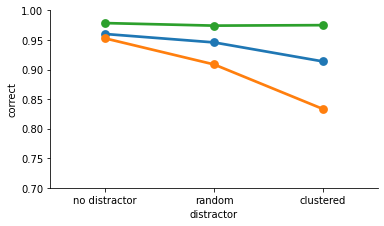

In [92]:
chart = correctPlot('distractor')


<Figure size 1080x360 with 0 Axes>

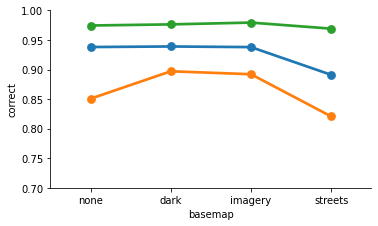

In [4]:
chart = correctPlot('basemap')


<Figure size 1080x360 with 0 Axes>

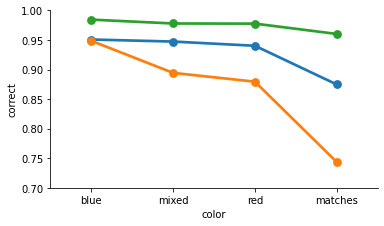

In [5]:
chart = correctPlot('color')


<Figure size 1080x360 with 0 Axes>

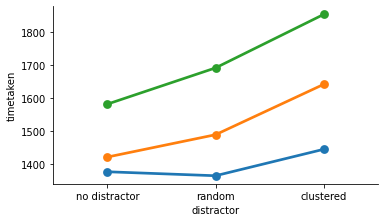

In [6]:
chart = plotTimeOverAll('distractor')


<Figure size 1080x360 with 0 Axes>

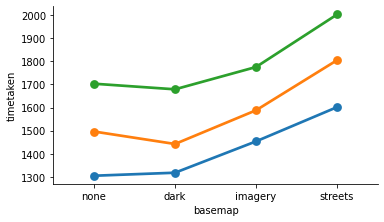

In [7]:
chart = plotTimeOverAll('basemap')


<Figure size 1080x360 with 0 Axes>

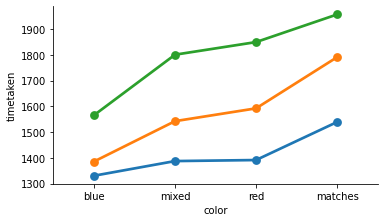

In [8]:
chart = plotTimeOverAll('color')


<Figure size 1080x360 with 0 Axes>

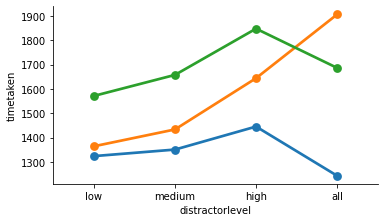

In [9]:
chart = plotDistractorAll('random')

<Figure size 1080x360 with 0 Axes>

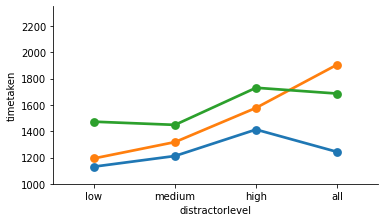

In [10]:
chart = plotDistractorByBasemap('random', 'none')

<Figure size 1080x360 with 0 Axes>

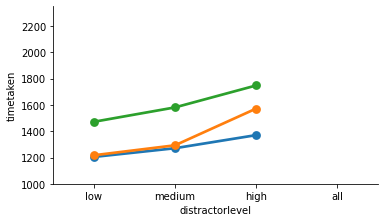

In [11]:
chart = plotDistractorByBasemap('random', 'dark')

<Figure size 1080x360 with 0 Axes>

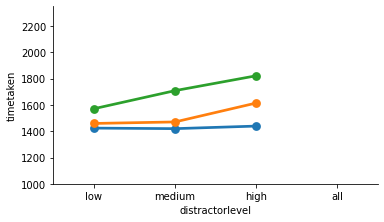

In [12]:
chart = plotDistractorByBasemap('random', 'imagery')

<Figure size 1080x360 with 0 Axes>

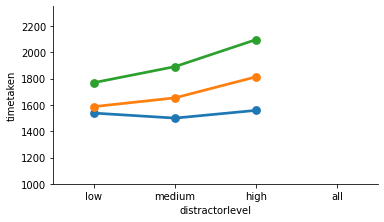

In [13]:
chart = plotDistractorByBasemap('random', 'streets')

<Figure size 1080x360 with 0 Axes>

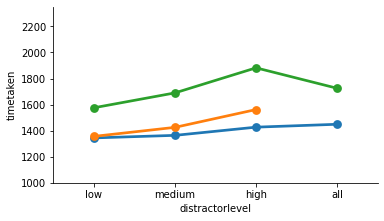

In [14]:
chart = plotDistractorByColor('random', 'mixed')

<Figure size 1080x360 with 0 Axes>

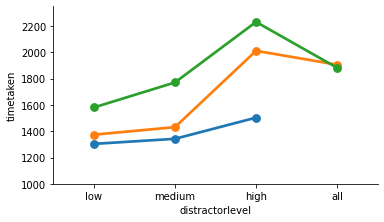

In [15]:
chart = plotDistractorByColor('random', 'matches')

<Figure size 1080x360 with 0 Axes>

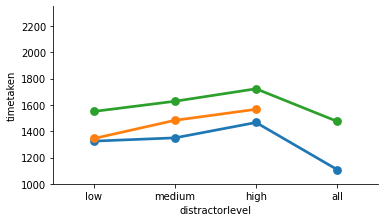

In [16]:
chart = plotDistractorByColor('random', 'red')

<Figure size 1080x360 with 0 Axes>

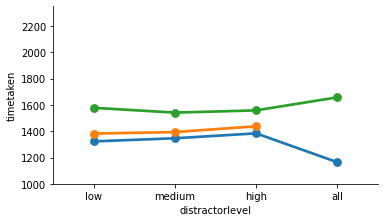

In [17]:
chart = plotDistractorByColor('random', 'blue')

<Figure size 1080x360 with 0 Axes>

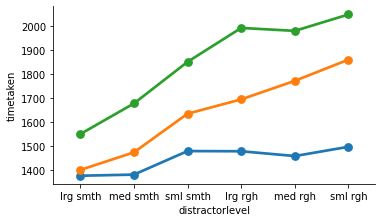

In [18]:
chart = plotDistractorAll('clustered')


<Figure size 1080x360 with 0 Axes>

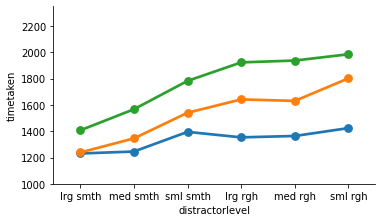

In [19]:
chart = plotDistractorByBasemap('clustered', 'none')


<Figure size 1080x360 with 0 Axes>

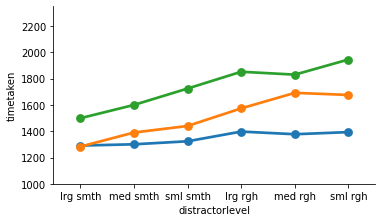

In [20]:
chart = plotDistractorByBasemap('clustered', 'dark')


<Figure size 1080x360 with 0 Axes>

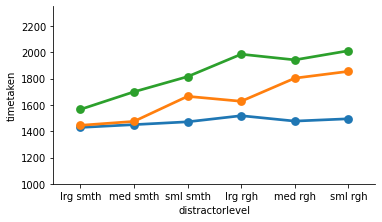

In [21]:
chart = plotDistractorByBasemap('clustered', 'imagery')


<Figure size 1080x360 with 0 Axes>

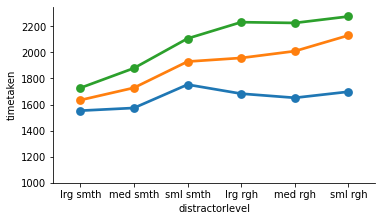

In [22]:
chart = plotDistractorByBasemap('clustered', 'streets')


<Figure size 1080x360 with 0 Axes>

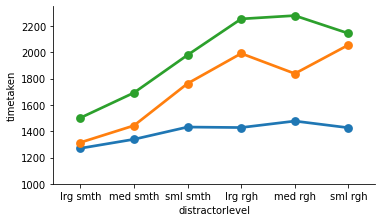

In [23]:
chart = plotDistractorByColor('clustered', 'mixed')


<Figure size 1080x360 with 0 Axes>

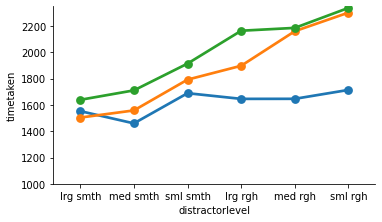

In [24]:
chart = plotDistractorByColor('clustered', 'matches')


<Figure size 1080x360 with 0 Axes>

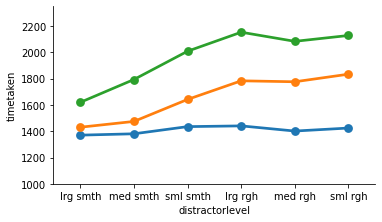

In [25]:
chart = plotDistractorByColor('clustered', 'red')


<Figure size 1080x360 with 0 Axes>

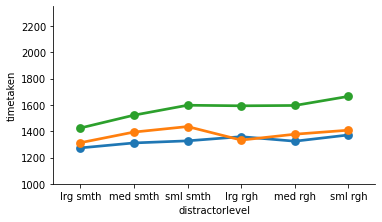

In [26]:
chart = plotDistractorByColor('clustered', 'blue')


<Figure size 1080x360 with 0 Axes>

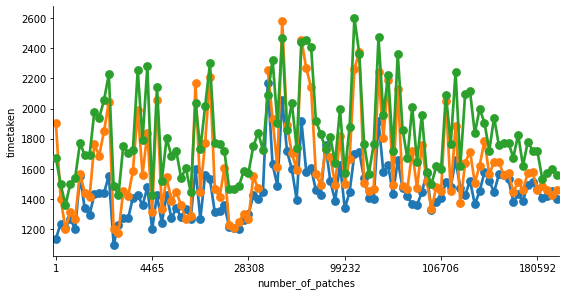

In [27]:
chart = plotMetric('number_of_patches')

<Figure size 1080x360 with 0 Axes>

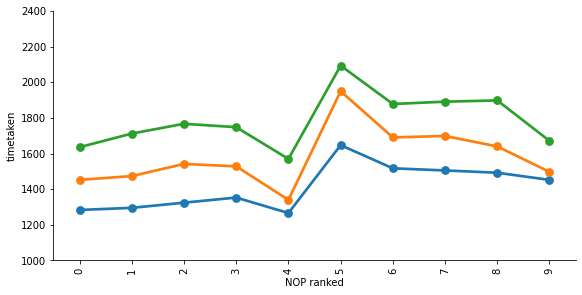

In [28]:
chart = plotMetricq('number_of_patches')


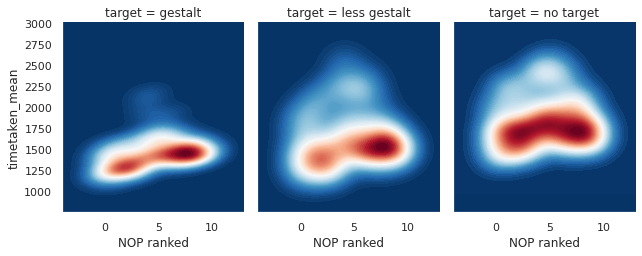

In [29]:
chart = plotKDEMetricq('number_of_patches')

In [30]:
gdata = getMetricRanges('number_of_patches')
gdata


,target,q_rank,number_of_patches_min,number_of_patches_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,1,1190,1283.288273,0.937817,"random,clustered","all,medium smooth,small smooth,large rough,lar...",none,"red,blue,mixed,matches",target-none-distractor-random-all-distractor-c...
1,gestalt,1,1554,3044,1295.149075,0.932535,"random,clustered","high,low,medium rough,large rough,small rough",none,"blue,red,mixed,matches",target-none-distractor-random-high-distractor-...
2,gestalt,2,3260,11697,1324.220892,0.937613,"random,clustered","medium,small smooth,small rough,medium rough,l...","none,dark","red,mixed,blue,matches",target-none-distractor-random-med-distractor-c...
3,gestalt,3,11768,16878,1352.868754,0.934710,clustered,"small rough,medium smooth,large rough,medium r...",dark,"matches,red,blue",target-none-distractor-clustered-small_rough-d...
4,gestalt,4,18065,28308,1265.937525,0.950098,"random,no distractor","high,missing,medium,low",dark,"blue,missing,red,matches,mixed",target-none-distractor-random-high-distractor-...
5,gestalt,5,31334,95164,1647.065217,0.853986,"random,clustered","high,all,small rough,small smooth,medium smoot...","dark,none,streets","mixed,matches,red,blue",target-none-distractor-random-high-distractor-...
6,gestalt,6,95448,100482,1516.973974,0.913490,"random,clustered","high,small smooth,medium rough,large smooth,me...","streets,imagery","matches,blue,red",target-none-distractor-random-high-distractor-...
7,gestalt,7,100869,104733,1505.080587,0.924427,"random,clustered","high,medium rough,small rough,large rough,larg...","streets,imagery","red,blue,matches",target-none-distractor-random-high-distractor-...
8,gestalt,8,106706,177232,1492.287500,0.937500,"random,clustered","high,medium,low,large rough","imagery,streets","red,mixed,blue,matches",target-none-distractor-random-high-distractor-...
9,gestalt,9,177456,194392,1451.982884,0.950109,"random,no distractor","low,medium,missing","streets,imagery","red,blue,missing,mixed,matches",target-none-distractor-random-low-distractor-c...


<Figure size 1080x360 with 0 Axes>

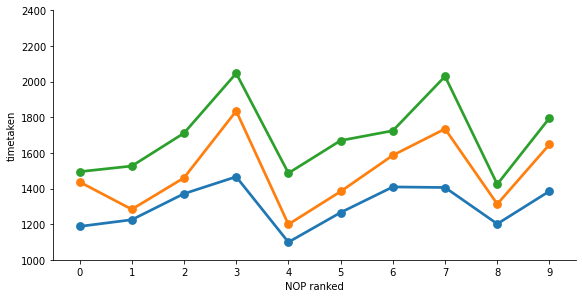

In [31]:
chart = plotMetricByBasemapq('number_of_patches', 'none')


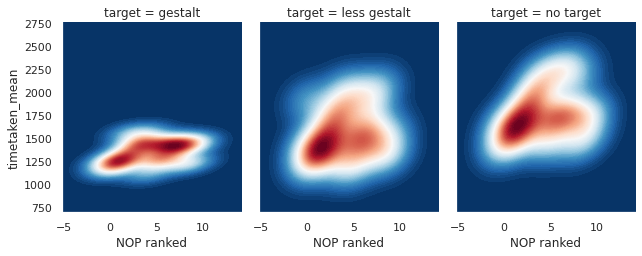

In [98]:
chart = plotKDEMetricByBasemapq('number_of_patches', 'none')


In [99]:
getMetricRangesByBaseMapq('number_of_patches', 'none')


<ipython-input-96-2054fa38b8be>:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['file'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,target,q_rank,number_of_patches_min,number_of_patches_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,1,61,1187.453169,0.952696,"random,clustered","all,medium smooth,large smooth",none,"red,blue,matches",target-none-distractor-random-all-distractor-c...
1,gestalt,1,90,123,1224.799373,0.942006,clustered,"medium smooth,large smooth",none,"blue,red,mixed",target-none-distractor-clustered-medium_smooth...
2,gestalt,2,156,406,1371.029904,0.924641,clustered,"small smooth,medium smooth",none,"matches,mixed,blue,red",target-none-distractor-clustered-small_smooth-...
3,gestalt,3,668,1874,1466.181495,0.895611,clustered,"medium rough,small smooth,large rough,small rough",none,"matches,mixed",target-none-distractor-clustered-medium_rough-...
4,gestalt,4,1903,1903,1099.003155,0.965300,random,low,none,"blue,red,matches",target-none-distractor-random-low-distractor-c...
5,gestalt,5,2128,2777,1265.438547,0.944134,"random,clustered","low,medium rough,large rough",none,"mixed,red,blue",target-none-distractor-random-low-distractor-c...
6,gestalt,6,3044,3044,1409.140379,0.921136,random,high,none,"blue,red,matches",target-none-distractor-random-high-distractor-...
7,gestalt,7,3260,4090,1405.839013,0.942421,clustered,"small rough,medium rough,large rough",none,"blue,red,mixed",target-none-distractor-clustered-small_rough-d...
8,gestalt,8,4465,4465,1201.632000,0.952000,random,medium,none,"red,blue,matches",target-none-distractor-random-med-distractor-c...
9,gestalt,9,5834,59521,1385.328217,0.942149,"random,clustered","high,all,medium,small rough",none,mixed,target-none-distractor-random-high-distractor-...


<Figure size 1080x360 with 0 Axes>

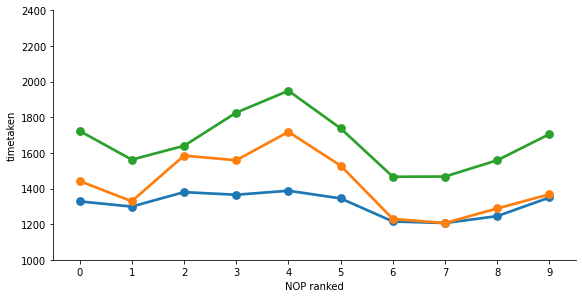

In [32]:
chart = plotMetricByBasemapq('number_of_patches', 'dark')

<Figure size 1080x360 with 0 Axes>

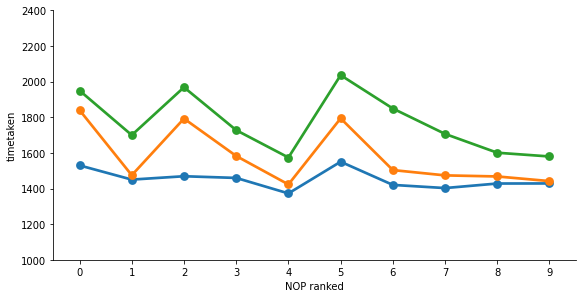

In [33]:
chart = plotMetricByBasemapq('number_of_patches', 'imagery')

<Figure size 1080x360 with 0 Axes>

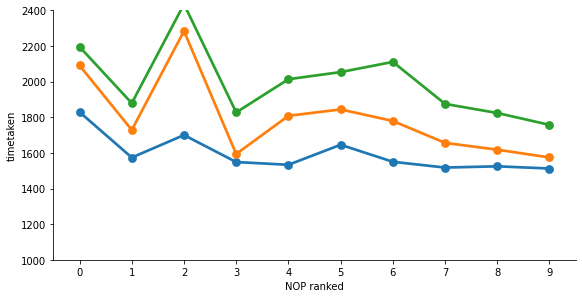

In [34]:
chart = plotMetricByBasemapq('number_of_patches', 'streets')

<Figure size 1080x360 with 0 Axes>

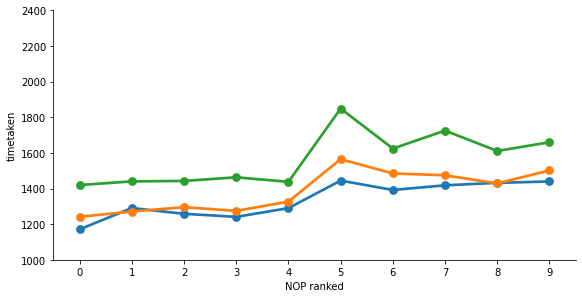

In [36]:
chart = plotMetricByColorq('number_of_patches', 'blue')


<Figure size 1080x360 with 0 Axes>

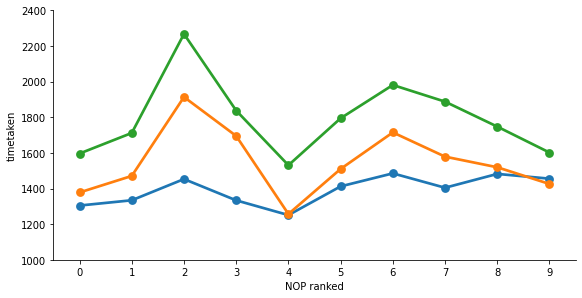

In [37]:
chart = plotMetricByColorq('number_of_patches', 'mixed')


<Figure size 1080x360 with 0 Axes>

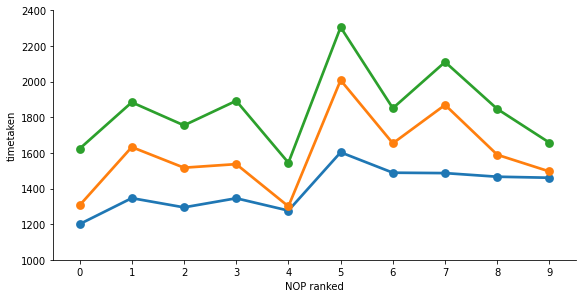

In [38]:
chart = plotMetricByColorq('number_of_patches', 'red')


<Figure size 1080x360 with 0 Axes>

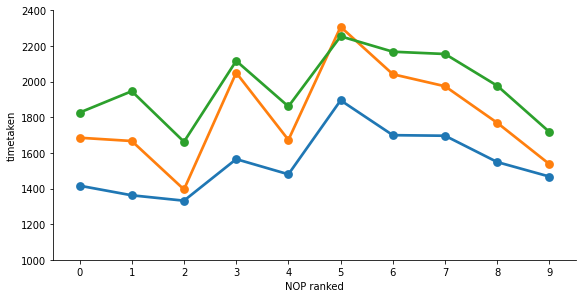

In [39]:
chart = plotMetricByColorq('number_of_patches', 'matches')


<Figure size 1080x360 with 0 Axes>

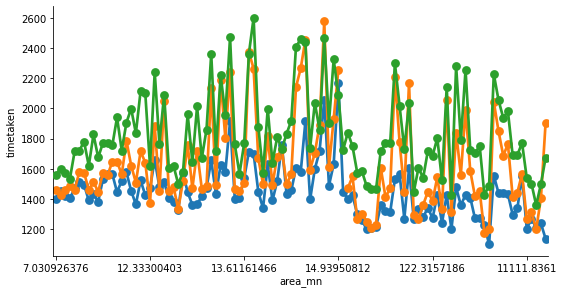

In [40]:
chart = plotMetric('area_mn')


<Figure size 1080x360 with 0 Axes>

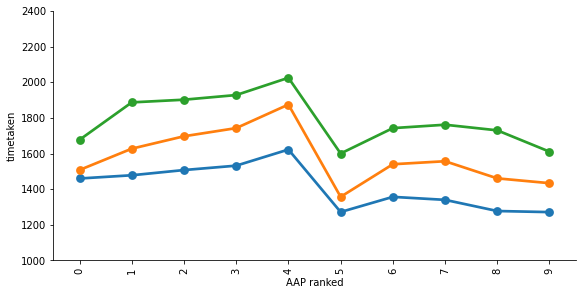

In [41]:
chart = plotMetricq('area_mn')


<Figure size 1080x360 with 0 Axes>

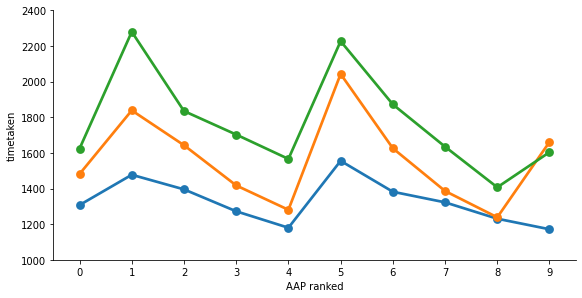

In [42]:
chart = plotMetricByBasemapq('area_mn', 'none')


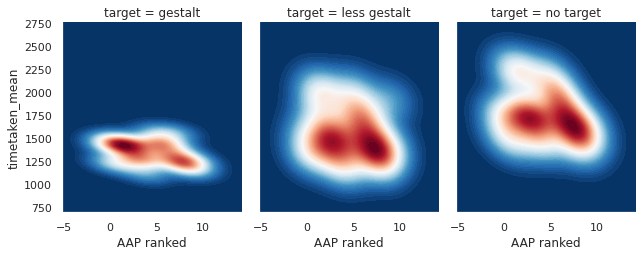

In [100]:
chart = plotKDEMetricByBasemapq('area_mn', 'none')


In [101]:
getMetricRangesByBaseMapq('area_mn', 'none')


<ipython-input-96-2054fa38b8be>:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['file'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,target,q_rank,area_mn_min,area_mn_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,22.962582,3.061043e+02,1307.332201,0.946332,"random,clustered","medium,high,all,small rough",none,"red,mixed,blue,matches",target-none-distractor-random-med-distractor-c...
1,gestalt,1,334.170132,3.341701e+02,1477.305556,0.921296,clustered,medium rough,none,mixed,target-none-distractor-clustered-medium_rough-...
2,gestalt,2,355.093749,4.489999e+02,1395.323877,0.935382,"random,clustered","high,small rough,large rough",none,"blue,red,matches,mixed",target-none-distractor-random-high-distractor-...
3,gestalt,3,492.169910,4.921699e+02,1272.223235,0.945330,clustered,medium rough,none,"red,blue",target-none-distractor-clustered-medium_rough-...
4,gestalt,4,620.688392,7.182112e+02,1179.939322,0.954295,"random,clustered","low,large rough",none,"mixed,blue,red,matches",target-none-distractor-random-low-distractor-c...
5,gestalt,5,729.325422,7.293254e+02,1555.425121,0.859903,clustered,small rough,none,matches,target-none-distractor-clustered-small_rough-d...
6,gestalt,6,879.508263,3.366394e+03,1381.936069,0.922710,clustered,"medium rough,small smooth,large rough",none,"matches,mixed,blue,red",target-none-distractor-clustered-medium_rough-...
7,gestalt,7,6973.244082,1.111184e+04,1322.467059,0.928235,clustered,"medium smooth,small smooth",none,"blue,matches,mixed,red",target-none-distractor-clustered-medium_smooth...
8,gestalt,8,15186.176000,2.240583e+04,1230.652582,0.948357,clustered,large smooth,none,"blue,red,mixed",target-none-distractor-clustered-large_smooth-...
9,gestalt,9,26283.766150,1.366756e+06,1171.438095,0.946032,"random,clustered","all,medium smooth",none,"red,blue,matches",target-none-distractor-random-all-distractor-c...


<Figure size 1080x360 with 0 Axes>

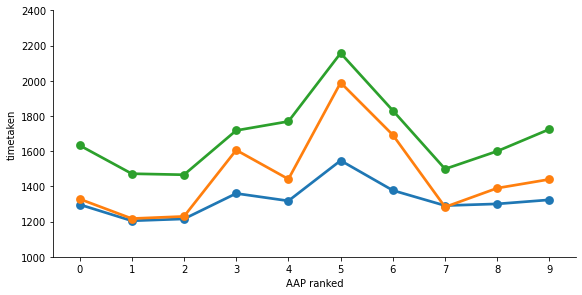

In [43]:
chart = plotMetricByBasemapq('area_mn', 'dark')


<Figure size 1080x360 with 0 Axes>

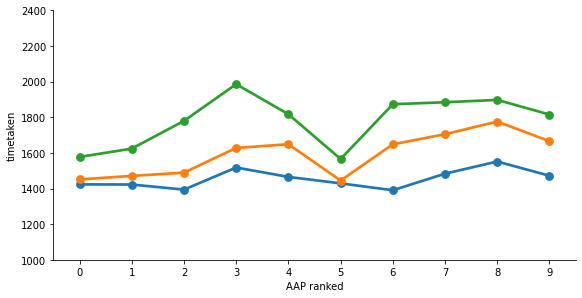

In [44]:
chart = plotMetricByBasemapq('area_mn', 'imagery')


<Figure size 1080x360 with 0 Axes>

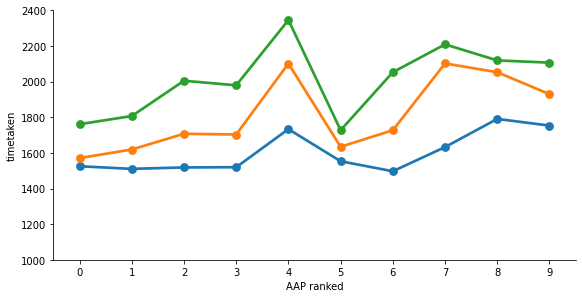

In [45]:
chart = plotMetricByBasemapq('area_mn', 'streets')


<Figure size 1080x360 with 0 Axes>

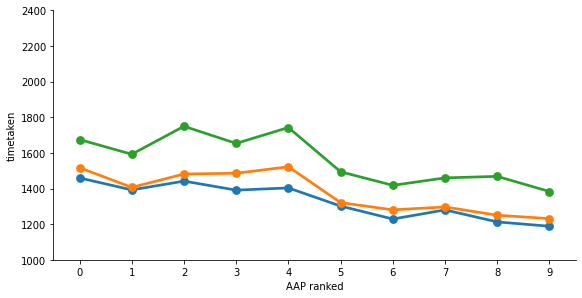

In [46]:
chart = plotMetricByColorq('area_mn', 'blue')


<Figure size 1080x360 with 0 Axes>

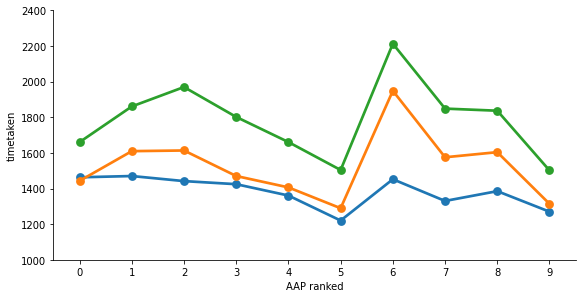

In [47]:
chart = plotMetricByColorq('area_mn', 'mixed')


<Figure size 1080x360 with 0 Axes>

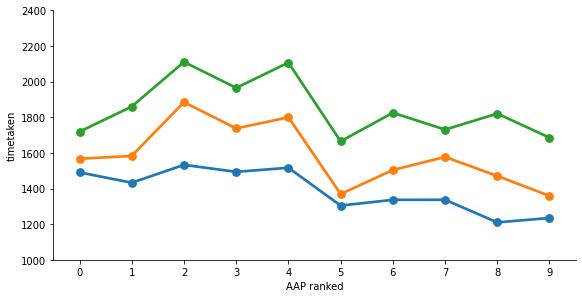

In [48]:
chart = plotMetricByColorq('area_mn', 'red')


<Figure size 1080x360 with 0 Axes>

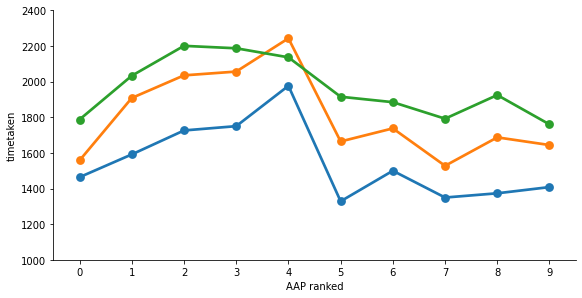

In [49]:
chart = plotMetricByColorq('area_mn', 'matches')


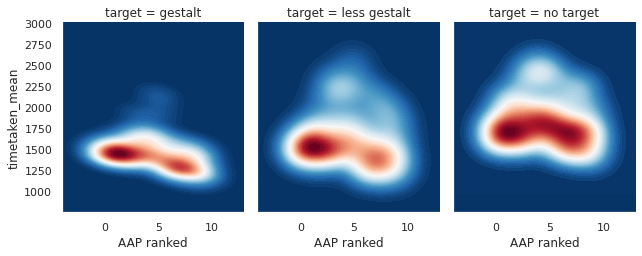

In [50]:
chart = plotKDEMetricq('area_mn')

In [51]:
gdata = getMetricRanges('area_mn')
gdata


,target,q_rank,area_mn_min,area_mn_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,7.030926,7.711676e+00,1459.922478,0.948206,"random,no distractor","low,medium,missing","streets,imagery","red,blue,missing,matches,mixed",target-none-distractor-random-low-distractor-c...
1,gestalt,1,8.131628,1.304991e+01,1478.039589,0.938050,"random,clustered","high,medium,large rough,large smooth","imagery,streets","red,mixed,blue,matches",target-none-distractor-random-high-distractor-...
2,gestalt,2,13.050031,1.360200e+01,1507.320245,0.924712,"random,clustered","high,medium rough,medium smooth,small rough,la...","streets,imagery","red,blue,matches",target-none-distractor-random-high-distractor-...
3,gestalt,3,13.602538,1.436211e+01,1531.939649,0.912582,"random,clustered","high,small smooth,medium rough,large smooth,me...","streets,imagery","matches,blue,red",target-none-distractor-random-high-distractor-...
4,gestalt,4,14.395693,4.828161e+01,1622.443444,0.855548,"random,clustered","high,medium,all,small rough,small smooth,mediu...","dark,none,streets","mixed,matches,red,blue",target-none-distractor-random-high-distractor-...
5,gestalt,5,54.036921,8.097854e+01,1271.741712,0.953005,"random,no distractor,clustered","high,missing,medium,low,small rough",dark,"blue,missing,red,matches,mixed",target-none-distractor-random-high-distractor-...
6,gestalt,6,90.651711,1.168467e+02,1356.744436,0.928930,clustered,"small rough,medium smooth,large rough,medium r...",dark,"matches,red,blue",target-none-distractor-clustered-small_rough-d...
7,gestalt,7,122.315719,4.489999e+02,1339.994035,0.935950,"random,clustered","high,medium,small smooth,small rough,medium ro...","none,dark","blue,red,matches,mixed",target-none-distractor-random-high-distractor-...
8,gestalt,8,492.169910,1.148534e+03,1277.322056,0.932334,"random,clustered","low,medium rough,large rough,small rough",none,"mixed,blue,red,matches",target-none-distractor-random-low-distractor-c...
9,gestalt,9,2046.041677,1.366756e+06,1271.217328,0.941027,"random,clustered","all,medium smooth,small smooth,large smooth",none,"red,blue,mixed,matches",target-none-distractor-random-all-distractor-c...


<Figure size 1080x360 with 0 Axes>

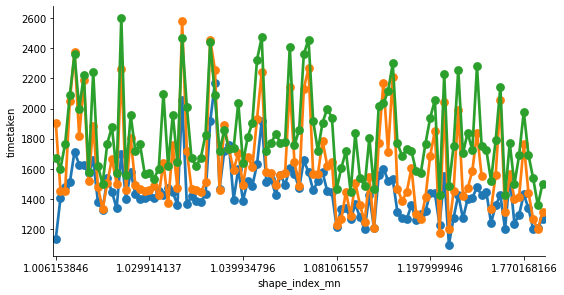

In [52]:
chart = plotMetric('shape_index_mn')

<Figure size 1080x360 with 0 Axes>

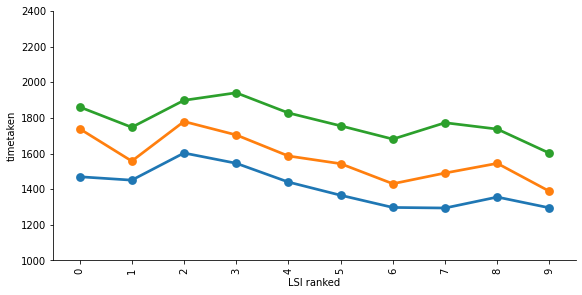

In [53]:
chart = plotMetricq('shape_index_mn')

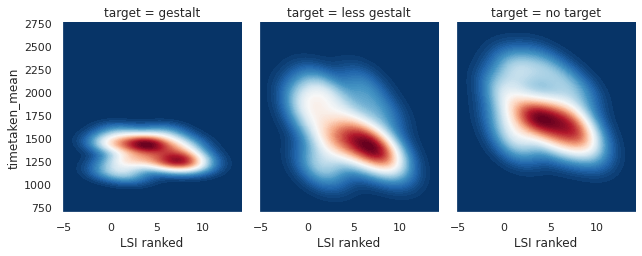

In [104]:
chart = plotKDEMetricByBasemapq('shape_index_mn', 'none')


In [102]:
getMetricRangesByBaseMapq('shape_index_mn', 'none')


<ipython-input-96-2054fa38b8be>:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['file'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,target,q_rank,shape_index_mn_min,shape_index_mn_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,1.006154,1.207206,1277.600771,0.928640,"random,clustered","all,low,medium rough,large rough",none,"red,mixed,blue,matches",target-none-distractor-random-all-distractor-c...
1,gestalt,1,1.210108,1.224306,1211.344828,0.939358,"random,clustered","low,small rough",none,"blue,red,matches",target-none-distractor-random-low-distractor-c...
2,gestalt,2,1.235303,1.253995,1324.886115,0.945398,clustered,large rough,none,"red,mixed,blue",target-none-distractor-clustered--large_rough-...
3,gestalt,3,1.259843,1.270032,1353.123020,0.931034,"random,clustered","high,medium rough",none,"blue,red,matches",target-none-distractor-random-high-distractor-...
4,gestalt,4,1.270829,1.338836,1450.501563,0.931250,"random,clustered","high,all,medium rough",none,mixed,target-none-distractor-random-high-distractor-...
5,gestalt,5,1.345921,1.462797,1346.316471,0.947059,"random,clustered","medium,small rough",none,"mixed,blue,red",target-none-distractor-random-med-distractor-c...
6,gestalt,6,1.472982,1.472982,1201.632000,0.952000,random,medium,none,"red,blue,matches",target-none-distractor-random-med-distractor-c...
7,gestalt,7,1.618323,1.749450,1345.235646,0.919856,clustered,"small smooth,medium smooth",none,"matches,blue,red",target-none-distractor-clustered-small_smooth-...
8,gestalt,8,1.770168,1.950684,1294.350058,0.947491,clustered,"medium smooth,small smooth",none,"blue,mixed,red",target-none-distractor-clustered-medium_smooth...
9,gestalt,9,1.952251,2.081569,1230.652582,0.948357,clustered,large smooth,none,"blue,red,mixed",target-none-distractor-clustered-large_smooth-...


<Figure size 1080x360 with 0 Axes>

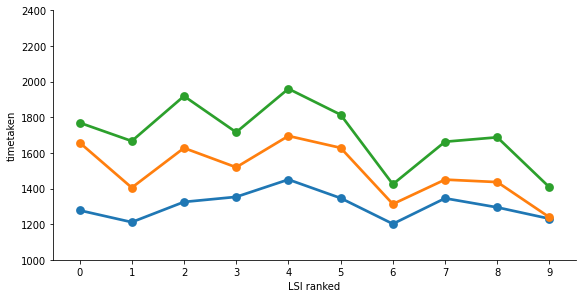

In [103]:
chart = plotMetricByBasemapq('shape_index_mn', 'none')


<Figure size 1080x360 with 0 Axes>

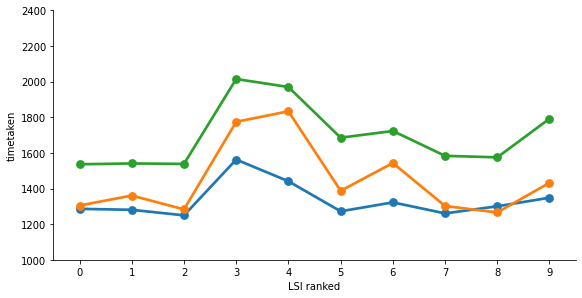

In [55]:
chart = plotMetricByBasemapq('shape_index_mn', 'dark')


<Figure size 1080x360 with 0 Axes>

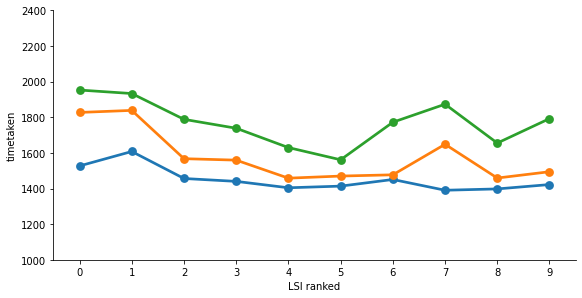

In [56]:
chart = plotMetricByBasemapq('shape_index_mn', 'imagery')


<Figure size 1080x360 with 0 Axes>

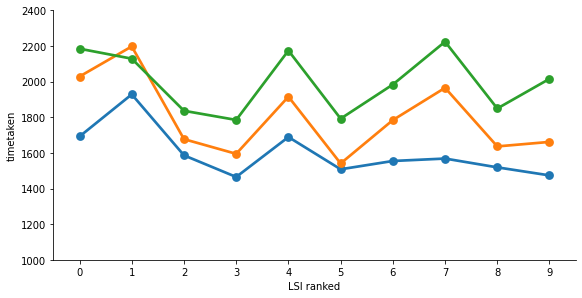

In [57]:
chart = plotMetricByBasemapq('shape_index_mn', 'streets')


<Figure size 1080x360 with 0 Axes>

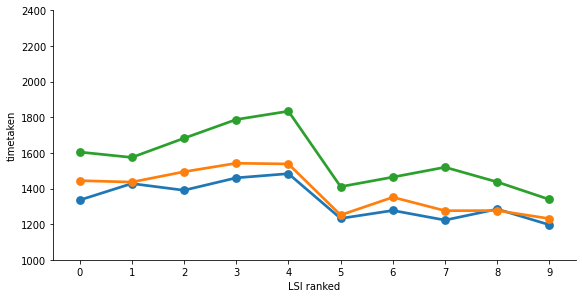

In [58]:
chart = plotMetricByColorq('shape_index_mn', 'blue')


<Figure size 1080x360 with 0 Axes>

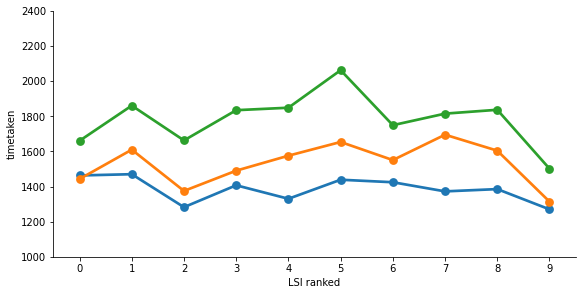

In [59]:
chart = plotMetricByColorq('shape_index_mn', 'mixed')


<Figure size 1080x360 with 0 Axes>

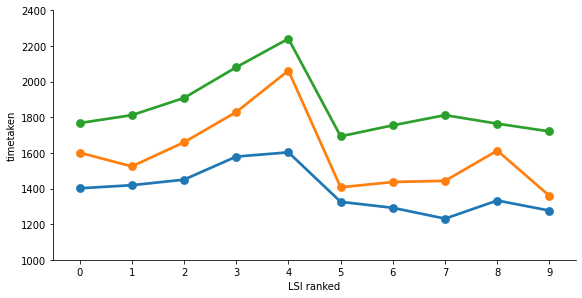

In [60]:
chart = plotMetricByColorq('shape_index_mn', 'red')


<Figure size 1080x360 with 0 Axes>

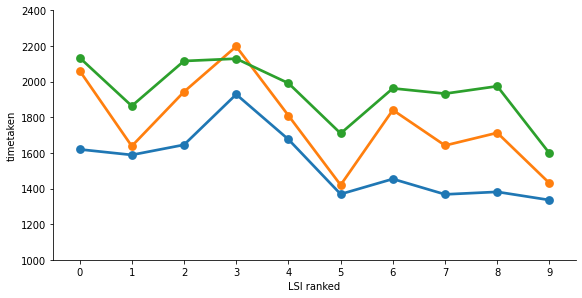

In [61]:
chart = plotMetricByColorq('shape_index_mn', 'matches')


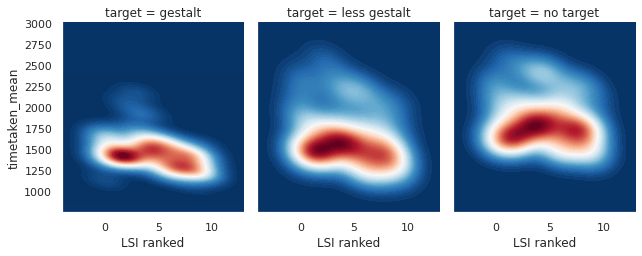

In [62]:
chart = plotKDEMetricq('shape_index_mn')


In [63]:
gdata = getMetricRanges('shape_index_mn')
gdata


,target,q_rank,shape_index_mn_min,shape_index_mn_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,1.006154,1.028618,1469.691862,0.921348,"random,clustered","high,all,medium rough,large smooth,small smoot...","imagery,none","red,blue,matches",target-none-distractor-random-high-distractor-...
1,gestalt,1,1.028619,1.030107,1450.638594,0.943610,"random,no distractor,clustered","high,low,missing,large rough,small smooth,medi...","streets,imagery","red,blue,missing,mixed,matches",target-none-distractor-random-high-distractor-...
2,gestalt,2,1.031021,1.039570,1602.952210,0.853396,"random,clustered","medium,small rough,large smooth,small smooth,m...","imagery,streets","red,blue,mixed,matches",target-none-distractor-random-med-distractor-c...
3,gestalt,3,1.039814,1.042213,1545.381039,0.923356,"random,no distractor,clustered","low,missing,medium rough,small smooth,medium s...",streets,"red,missing,blue,mixed,matches",target-none-distractor-random-low-distractor-c...
4,gestalt,4,1.042243,1.085300,1439.875254,0.940339,"no distractor,random,clustered","missing,medium,low,large rough,large smooth,sm...","dark,streets","missing,red,matches,blue,mixed","target-none-no-distractor-basemap-dark.png,tar..."
5,gestalt,5,1.088562,1.100098,1365.852286,0.924971,"random,clustered","high,low,small rough,medium smooth,large rough...","streets,dark,imagery","mixed,red,blue,matches",target-none-distractor-random-high-distractor-...
6,gestalt,6,1.107299,1.151416,1297.282796,0.948746,"random,clustered","high,medium,small smooth,large rough,medium rough",dark,"blue,red,matches,mixed",target-none-distractor-random-high-distractor-...
7,gestalt,7,1.157070,1.259843,1294.236762,0.938280,"random,clustered","low,medium rough,small rough,large rough","none,dark","mixed,blue,red,matches",target-none-distractor-random-low-distractor-c...
8,gestalt,8,1.259957,1.472982,1355.685435,0.939649,"random,clustered","high,medium,all,small rough,medium rough","none,dark","blue,red,mixed,matches",target-none-distractor-random-high-distractor-...
9,gestalt,9,1.618323,2.081569,1295.138079,0.937822,clustered,"medium smooth,small smooth,large smooth",none,"blue,mixed,matches,red",target-none-distractor-clustered-medium_smooth...


<Figure size 1080x360 with 0 Axes>

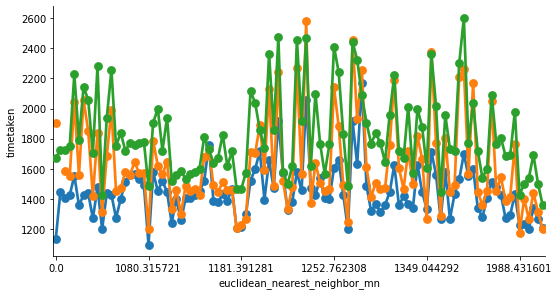

In [64]:
chart = plotMetric('euclidean_nearest_neighbor_mn')

<Figure size 1080x360 with 0 Axes>

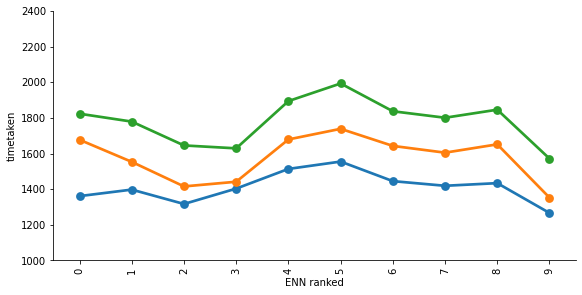

In [65]:
chart = plotMetricq('euclidean_nearest_neighbor_mn')

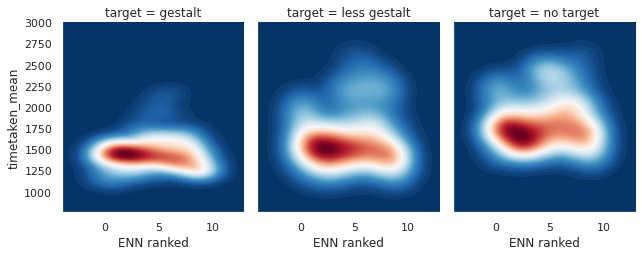

In [66]:
chart = plotKDEMetricq('euclidean_nearest_neighbor_mn')


<Figure size 1080x360 with 0 Axes>

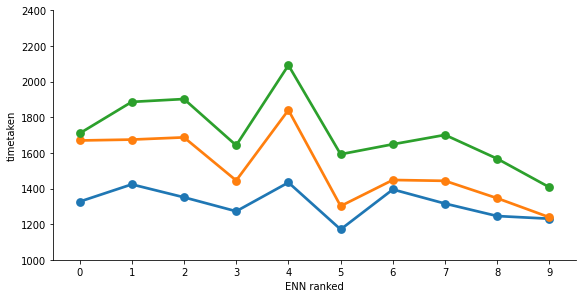

In [67]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn', 'none')


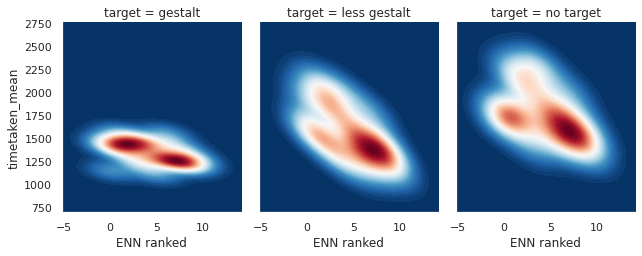

In [106]:
chart = plotKDEMetricByBasemapq('euclidean_nearest_neighbor_mn', 'none')


In [107]:
getMetricRangesByBaseMapq('euclidean_nearest_neighbor_mn', 'none')


<ipython-input-96-2054fa38b8be>:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['file'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,target,q_rank,euclidean_nearest_neighbor_mn_min,euclidean_nearest_neighbor_mn_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,0.000000,506.285303,1326.405384,0.933492,random,"high,all",none,"blue,red,mixed,matches",target-none-distractor-random-high-distractor-...
1,gestalt,1,567.121169,620.666788,1423.379147,0.926540,"random,clustered","high,small rough",none,"mixed,blue,red,matches",target-none-distractor-random-high-distractor-...
2,gestalt,2,623.037529,659.979781,1350.833333,0.932401,clustered,"medium rough,small rough",none,"matches,red,mixed,blue",target-none-distractor-clustered-medium_rough-...
3,gestalt,3,660.551010,676.857165,1272.435196,0.944114,"random,clustered","medium,medium rough",none,"red,blue,matches,mixed",target-none-distractor-random-med-distractor-c...
4,gestalt,4,687.919904,690.861034,1433.971429,0.926190,clustered,large rough,none,"matches,mixed",target-none-distractor-clustered--large_rough-...
5,gestalt,5,695.650853,1080.315721,1170.541706,0.955014,"random,clustered","low,large rough",none,"blue,red,matches",target-none-distractor-random-low-distractor-c...
6,gestalt,6,1106.726060,1400.919653,1394.969121,0.902613,"random,clustered","medium,small smooth",none,"mixed,matches",target-none-distractor-random-med-distractor-c...
7,gestalt,7,1636.641601,1988.431601,1315.565060,0.946988,"random,clustered","low,small smooth",none,"mixed,blue,red",target-none-distractor-random-low-distractor-c...
8,gestalt,8,2255.735964,3038.239910,1245.559579,0.941589,clustered,medium smooth,none,"blue,mixed,matches,red",target-none-distractor-clustered-medium_smooth...
9,gestalt,9,4191.995427,4339.842849,1230.652582,0.948357,clustered,large smooth,none,"blue,red,mixed",target-none-distractor-clustered-large_smooth-...


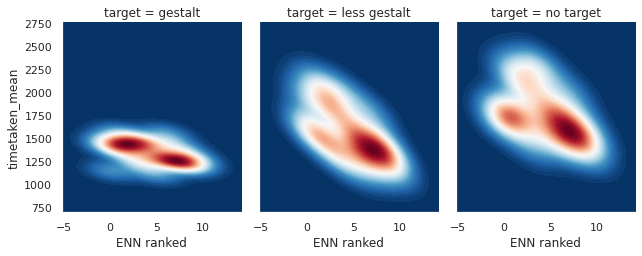

In [97]:
chart = plotKDEMetricByBasemapq('euclidean_nearest_neighbor_mn', 'none')


In [93]:
getMetricRangesByBaseMapq('euclidean_nearest_neighbor_mn', 'none')


<ipython-input-91-d97326028ad7>:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['file'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-91-d97326028ad7>:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-91-d97326028ad7>:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,target,q_rank,euclidean_nearest_neighbor_mn_min,euclidean_nearest_neighbor_mn_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,0.000000,506.285303,1326.405384,0.933492,random,"high,all",none,"blue,red,mixed,matches",target-none-distractor-random-high-distractor-...
1,gestalt,1,567.121169,620.666788,1423.379147,0.926540,"random,clustered","high,small rough",none,"mixed,blue,red,matches",target-none-distractor-random-high-distractor-...
2,gestalt,2,623.037529,659.979781,1350.833333,0.932401,clustered,"medium rough,small rough",none,"matches,red,mixed,blue",target-none-distractor-clustered-medium_rough-...
3,gestalt,3,660.551010,676.857165,1272.435196,0.944114,"random,clustered","medium,medium rough",none,"red,blue,matches,mixed",target-none-distractor-random-med-distractor-c...
4,gestalt,4,687.919904,690.861034,1433.971429,0.926190,clustered,large rough,none,"matches,mixed",target-none-distractor-clustered--large_rough-...
5,gestalt,5,695.650853,1080.315721,1170.541706,0.955014,"random,clustered","low,large rough",none,"blue,red,matches",target-none-distractor-random-low-distractor-c...
6,gestalt,6,1106.726060,1400.919653,1394.969121,0.902613,"random,clustered","medium,small smooth",none,"mixed,matches",target-none-distractor-random-med-distractor-c...
7,gestalt,7,1636.641601,1988.431601,1315.565060,0.946988,"random,clustered","low,small smooth",none,"mixed,blue,red",target-none-distractor-random-low-distractor-c...
8,gestalt,8,2255.735964,3038.239910,1245.559579,0.941589,clustered,medium smooth,none,"blue,mixed,matches,red",target-none-distractor-clustered-medium_smooth...
9,gestalt,9,4191.995427,4339.842849,1230.652582,0.948357,clustered,large smooth,none,"blue,red,mixed",target-none-distractor-clustered-large_smooth-...


<Figure size 1080x360 with 0 Axes>

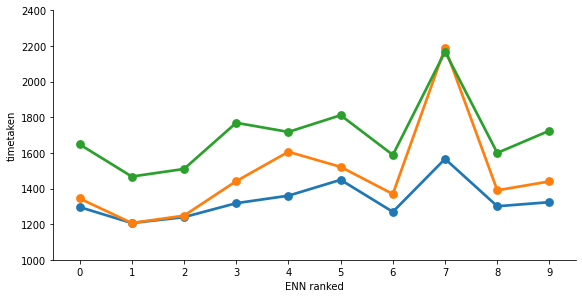

In [68]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn', 'dark')


<Figure size 1080x360 with 0 Axes>

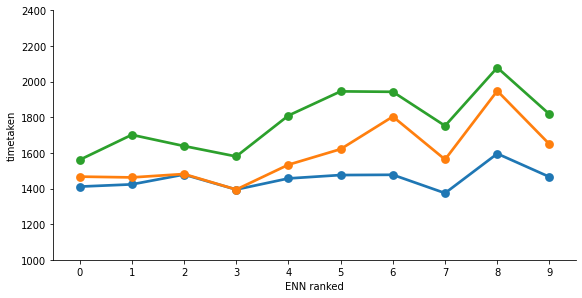

In [69]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn', 'imagery')


<Figure size 1080x360 with 0 Axes>

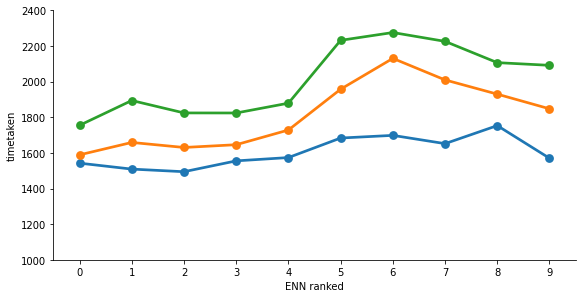

In [70]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn', 'streets')


<Figure size 1080x360 with 0 Axes>

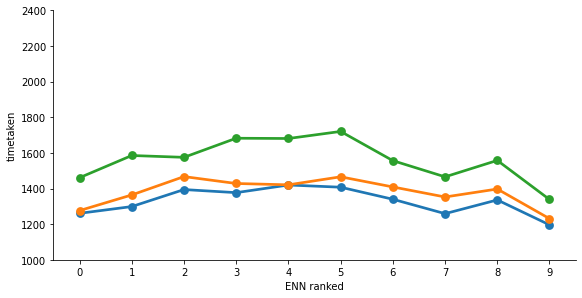

In [71]:
chart = plotMetricByColorq('euclidean_nearest_neighbor_mn', 'blue')


<Figure size 1080x360 with 0 Axes>

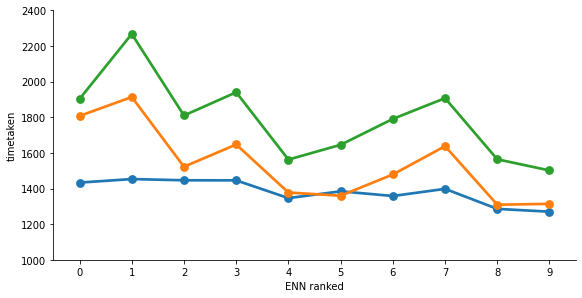

In [72]:
chart = plotMetricByColorq('euclidean_nearest_neighbor_mn', 'mixed')


<Figure size 1080x360 with 0 Axes>

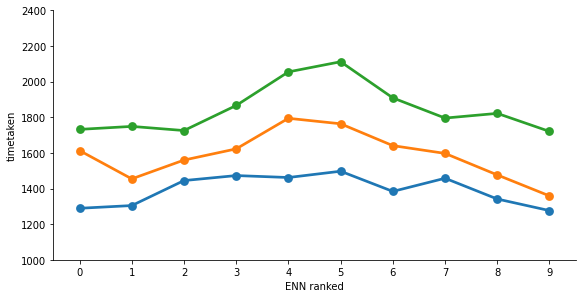

In [73]:
chart = plotMetricByColorq('euclidean_nearest_neighbor_mn', 'red')


<Figure size 1080x360 with 0 Axes>

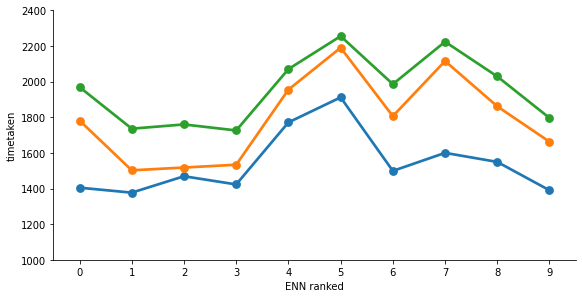

In [74]:
chart = plotMetricByColorq('euclidean_nearest_neighbor_mn', 'matches')


In [75]:
gdata = getMetricRanges('euclidean_nearest_neighbor_mn')
gdata


,target,q_rank,euclidean_nearest_neighbor_mn_min,euclidean_nearest_neighbor_mn_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,0.000000,659.979781,1361.078246,0.931197,"random,clustered","high,all,medium rough,small rough",none,"blue,red,mixed,matches",target-none-distractor-random-high-distractor-...
1,gestalt,1,660.551010,1070.120981,1397.522459,0.940561,"random,no distractor,clustered","low,high,missing,medium,large rough,medium rough","streets,dark,none","red,mixed,missing,matches,blue",target-none-distractor-random-low-distractor-c...
2,gestalt,2,1080.315721,1128.871346,1316.845004,0.950766,"random,no distractor","low,medium,missing","imagery,dark,streets,none","blue,red,missing,matches,mixed",target-none-distractor-random-low-distractor-c...
3,gestalt,3,1129.452490,1180.137604,1403.233804,0.931958,"random,clustered","medium,low,large smooth","imagery,dark,streets","red,blue,mixed,matches",target-none-distractor-random-med-distractor-c...
4,gestalt,4,1181.391281,1223.936640,1513.660637,0.911722,"random,no distractor,clustered","high,missing,medium,medium smooth,large rough,...","streets,dark,imagery","mixed,missing,red,matches,blue",target-none-distractor-random-high-distractor-...
5,gestalt,5,1229.328497,1275.806745,1554.901832,0.900733,"random,clustered","low,large rough,medium rough,small rough,small...","dark,imagery,streets","mixed,red,blue,matches",target-none-distractor-random-low-distractor-c...
6,gestalt,6,1279.677781,1338.388556,1445.037750,0.916515,"random,clustered","high,small rough,large rough,medium rough,smal...","dark,imagery,streets","blue,matches,red,mixed",target-none-distractor-random-high-distractor-...
7,gestalt,7,1340.668772,1371.341380,1419.032154,0.923901,"random,clustered","high,small smooth,large rough,small rough,medi...","streets,imagery,dark","red,blue,matches",target-none-distractor-random-high-distractor-...
8,gestalt,8,1373.971542,1634.938806,1433.778866,0.920999,"random,clustered","high,small smooth,small rough,medium smooth,me...","imagery,streets,dark,none","red,blue,matches",target-none-distractor-random-high-distractor-...
9,gestalt,9,1636.641601,4339.842849,1266.453763,0.945376,"random,clustered","low,medium smooth,small smooth,large smooth",none,"mixed,blue,matches,red",target-none-distractor-random-low-distractor-c...


<Figure size 1080x360 with 0 Axes>

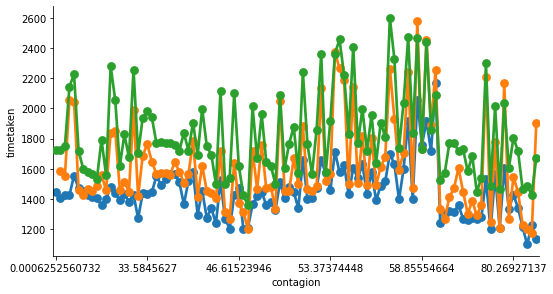

In [76]:
chart = plotMetric('contagion')



<Figure size 1080x360 with 0 Axes>

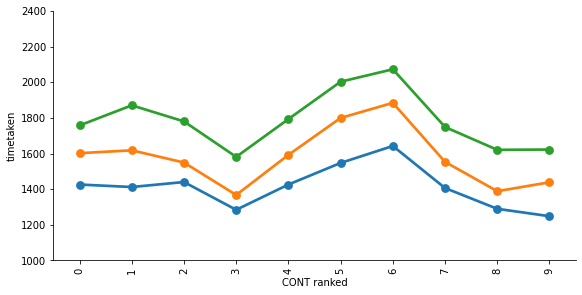

In [77]:
chart = plotMetricq('contagion')


<Figure size 1080x360 with 0 Axes>

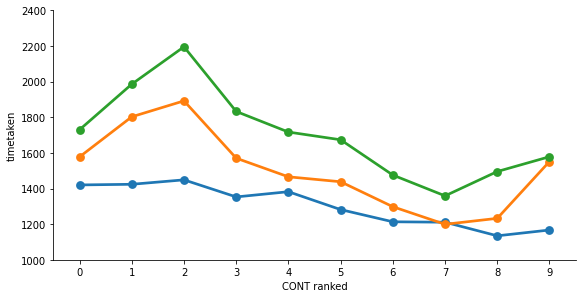

In [78]:
chart = plotMetricByBasemapq('contagion', 'none')


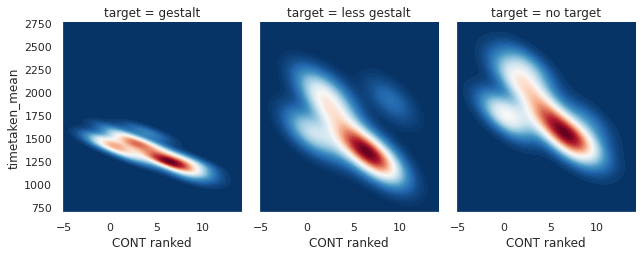

In [108]:
chart = plotKDEMetricByBasemapq('contagion', 'none')


In [109]:
getMetricRangesByBaseMapq('contagion', 'none')


<ipython-input-96-2054fa38b8be>:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['file'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadfLim['list'] = datadfLim['list'].replace('/tiledata/maps/map-for-s3-tifs-georef/target-none/', '', regex=True)
<ipython-input-96-2054fa38b8be>:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,target,q_rank,contagion_min,contagion_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,0.000625,15.457453,1420.243856,0.927221,random,"high,all",none,"blue,red,mixed,matches",target-none-distractor-random-high-distractor-...
1,gestalt,1,23.754814,28.122607,1423.895858,0.927811,clustered,small rough,none,"mixed,blue,red,matches",target-none-distractor-clustered-small_rough-d...
2,gestalt,2,28.810491,31.763743,1448.827532,0.919304,clustered,"medium rough,large rough",none,"matches,mixed",target-none-distractor-clustered-medium_rough-...
3,gestalt,3,33.419789,33.584563,1352.958478,0.933103,clustered,"medium rough,small smooth,large rough",none,"red,mixed,blue,matches",target-none-distractor-clustered-medium_rough-...
4,gestalt,4,35.099501,37.738116,1382.259259,0.919485,clustered,small smooth,none,"matches,blue,red",target-none-distractor-clustered-small_smooth-...
5,gestalt,5,38.354206,41.314481,1281.844728,0.935110,clustered,"medium smooth,large rough",none,"mixed,matches,red,blue",target-none-distractor-clustered-medium_smooth...
6,gestalt,6,43.160021,47.016269,1213.334917,0.946952,"random,clustered","medium,medium smooth,large smooth",none,"red,blue,matches,mixed",target-none-distractor-random-med-distractor-c...
7,gestalt,7,47.518186,47.518186,1211.081967,0.962529,clustered,large smooth,none,"blue,red",target-none-distractor-clustered-large_smooth-...
8,gestalt,8,66.959903,83.012499,1134.654846,0.958629,random,"low,medium",none,"blue,red,mixed,matches",target-none-distractor-random-low-distractor-c...
9,gestalt,9,90.576319,100.000000,1167.175041,0.956240,random,"all,low",none,"red,mixed,blue",target-none-distractor-random-all-distractor-c...


<Figure size 1080x360 with 0 Axes>

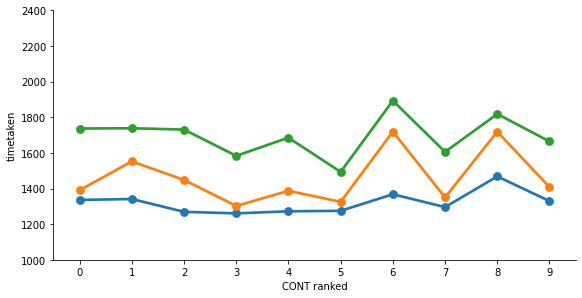

In [79]:
chart = plotMetricByBasemapq('contagion', 'dark')


<Figure size 1080x360 with 0 Axes>

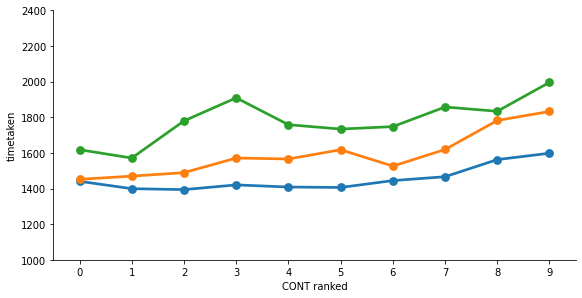

In [80]:
chart = plotMetricByBasemapq('contagion', 'imagery')


<Figure size 1080x360 with 0 Axes>

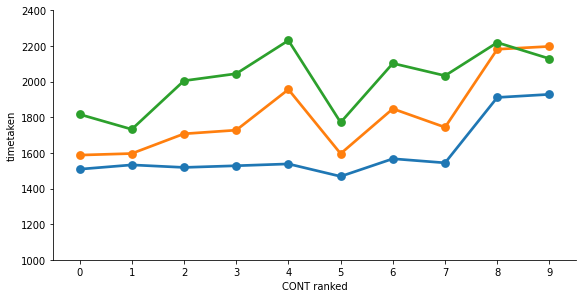

In [81]:
chart = plotMetricByBasemapq('contagion', 'streets')


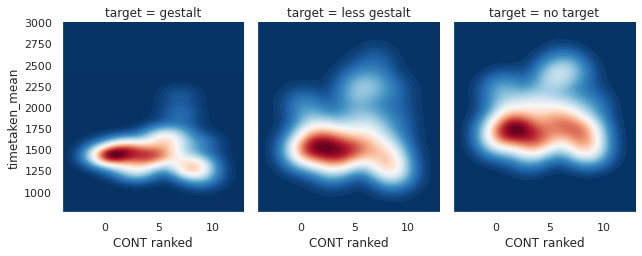

In [82]:
chart = plotKDEMetricq('contagion')

In [83]:
gdata = getMetricRanges('contagion')
gdata


,target,q_rank,contagion_min,contagion_max,timetaken_mean,correct_mean,distractor,distractorlevel,basemap,color,list
0,gestalt,0,0.000625,28.122607,1425.988144,0.937669,"random,clustered","high,low,medium,all,small rough","none,imagery","blue,red,mixed,matches",target-none-distractor-random-high-distractor-...
1,gestalt,1,28.166558,35.099501,1412.068206,0.929989,"random,no distractor,clustered","medium,missing,medium rough,small smooth,large...","imagery,streets,none","red,blue,missing,matches,mixed",target-none-distractor-random-med-distractor-c...
2,gestalt,2,35.454621,38.354206,1440.056163,0.944931,"random,no distractor,clustered","low,medium,missing,high,large rough,small smooth","streets,imagery,none","red,missing,matches,blue,mixed",target-none-distractor-random-low-distractor-c...
3,gestalt,3,39.971769,47.518186,1284.112041,0.946162,"random,clustered","high,medium,large rough,medium smooth,large sm...","streets,none,imagery","mixed,red,blue,matches",target-none-distractor-random-high-distractor-...
4,gestalt,4,48.557243,50.835765,1426.004375,0.939118,"random,clustered","high,small smooth,medium smooth,small rough,la...",imagery,"red,blue,matches",target-none-distractor-random-high-distractor-...
5,gestalt,5,50.842377,54.930715,1547.257736,0.922825,"random,clustered","high,medium rough,large rough,medium smooth,sm...","streets,imagery","blue,matches,red",target-none-distractor-random-high-distractor-...
6,gestalt,6,55.070084,58.947451,1642.375766,0.871980,"random,clustered","high,small rough,large smooth,small smooth,med...","streets,dark","red,mixed,matches,blue",target-none-distractor-random-high-distractor-...
7,gestalt,7,59.765957,73.593794,1406.193572,0.903575,"random,clustered","high,medium,small rough,large rough,small smoo...","dark,none,streets","blue,matches,mixed,red",target-none-distractor-random-high-distractor-...
8,gestalt,8,74.187400,78.424608,1289.694963,0.937500,"random,clustered","medium,low,small smooth,small rough,medium smo...",dark,"red,blue,matches,mixed",target-none-distractor-random-med-distractor-c...
9,gestalt,9,79.206249,100.000000,1248.243490,0.937934,"random,no distractor,clustered","all,missing,low,large smooth,medium rough,smal...","none,dark","red,missing,mixed,blue,matches",target-none-distractor-random-all-distractor-c...


<Figure size 1080x360 with 0 Axes>

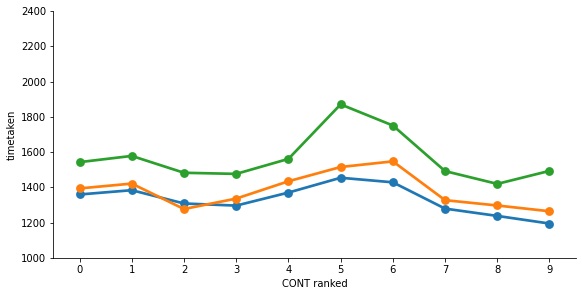

In [111]:
chart = plotMetricByColorq('contagion', 'blue')


<Figure size 1080x360 with 0 Axes>

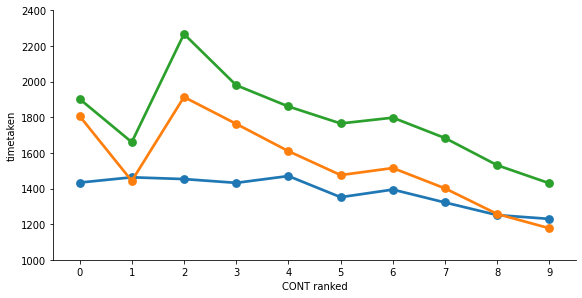

In [114]:
chart = plotMetricByColorq('contagion', 'mixed')


<Figure size 1080x360 with 0 Axes>

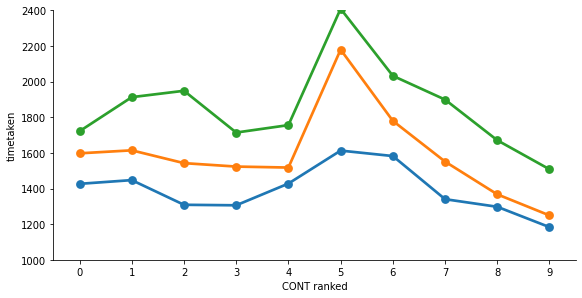

In [115]:
chart = plotMetricByColorq('contagion', 'red')


<Figure size 1080x360 with 0 Axes>

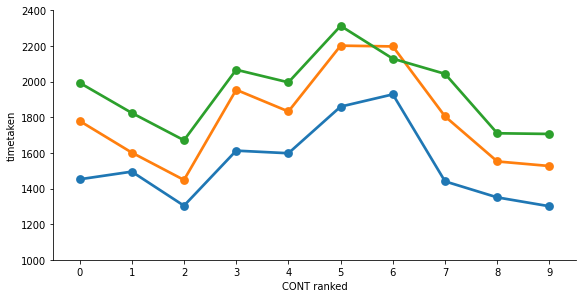

In [116]:
chart = plotMetricByColorq('contagion', 'matches')
